In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

In [3]:
import torch

In [4]:
import numpy as np

In [5]:
torch.cuda.is_available()  # Check if we can use GPUs

False

In [ ]:
!pip install torchsummary

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234)

N_p = 100

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, N_p), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()







----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 100, 40]              80
         LeakyReLU-2              [-1, 100, 40]               0
            Linear-3               [-1, 100, 1]              41
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.00
Estimated Total Size (MB): 0.06
----------------------------------------------------------------
Doing Iterations: 0 and Loss: 0.23471900820732117


<ipython-input-83-f8a58e45b641>:42: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


Doing Iterations: 50 and Loss: 0.0038674066308885813
Doing Iterations: 100 and Loss: 0.0017179547576233745
Doing Iterations: 150 and Loss: 0.0010395834688097239


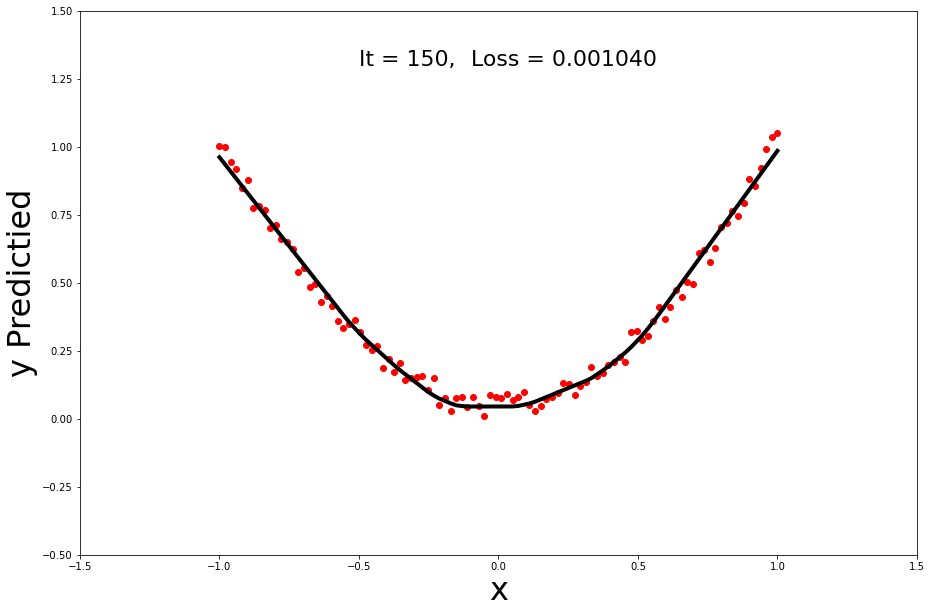

In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary



torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.

y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())



# Convert x and y to tracked variables

in_dim = 1
out_dim = 1

Net = torch.nn.Sequential(
      torch.nn.Linear(in_dim, 40),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(40, out_dim))


summary(Net, (100, 1))

# def init_weights(m):
#     if isinstance(m, torch.nn.Linear):
#         torch.nn.init.xavier_uniform(m.weight)
#         m.bias.data.fill_(0.00)

# Net.apply(init_weights)

# for name, params in Net.named_parameters():
#     if params.requires_grad:
#         print(f"name: {name}")
#         print(f"Params: {params}")


optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 150 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)



imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)




### Sin Function

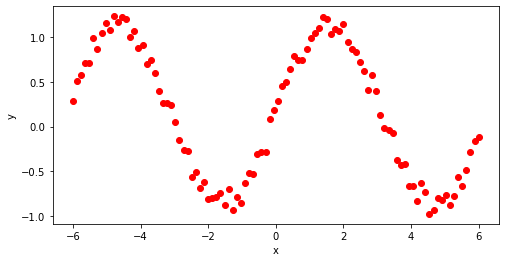

In [ ]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-6, 6, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.sin(x)
# Add Random Noise
y = y + 0.30*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()


Doing Iterations: 0 and Loss: 0.8034062385559082
Doing Iterations: 50 and Loss: 0.11373567581176758
Doing Iterations: 100 and Loss: 0.10786443948745728
Doing Iterations: 150 and Loss: 0.1027265340089798
Doing Iterations: 200 and Loss: 0.09231911599636078
Doing Iterations: 250 and Loss: 0.0758381336927414
Doing Iterations: 300 and Loss: 0.05385994538664818
Doing Iterations: 350 and Loss: 0.0337362065911293
Doing Iterations: 400 and Loss: 0.019557828083634377
Doing Iterations: 450 and Loss: 0.014799895696341991
Doing Iterations: 500 and Loss: 0.012736027128994465
Doing Iterations: 550 and Loss: 0.0102080674842
Doing Iterations: 600 and Loss: 0.009226702153682709
Doing Iterations: 650 and Loss: 0.008671664632856846
Doing Iterations: 700 and Loss: 0.007980658672749996
Doing Iterations: 750 and Loss: 0.007601229008287191
Doing Iterations: 800 and Loss: 0.007699568290263414
Doing Iterations: 850 and Loss: 0.0173762496560812
Doing Iterations: 900 and Loss: 0.0065982164815068245
Doing Iteratio

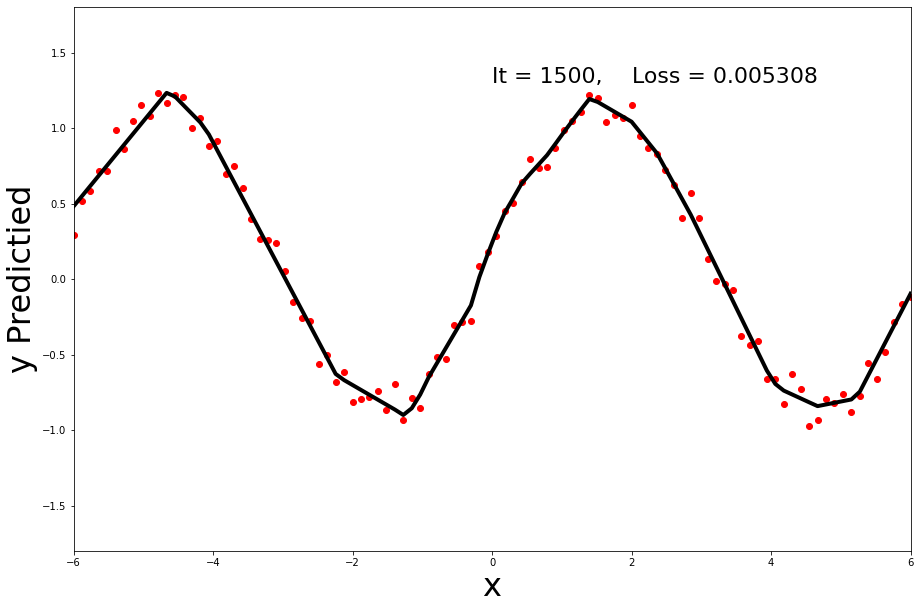

In [ ]:
# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 1500 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1.8, 1.8)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(0, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(2, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)



imageio.mimsave('./Sin_Regression_2.gif', image_list, fps=20)

In [ ]:
!pip install deepxde

     |████████████████████████████████| 117 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 12.6 MB/s ta 0:00:01


Deepxde backend not selected or invalid. Assuming tensorflow.compat.v1 for now.
Using backend: tensorflow.compat.v1



Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDEBACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch (all lowercase)
Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.040173 s



/Users/raj/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/raj/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


'compile' took 0.229847 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.58e-02, 4.51e-01, 0.00e+00, 1.00e+00]    [2.39e-02, 4.63e-01, 0.00e+00, 1.00e+00]    [1.26e+00]    
1000      [8.33e-03, 6.78e-03, 1.16e-08, 3.03e-04]    [9.17e-03, 6.33e-03, 1.16e-08, 3.03e-04]    [7.55e-01]    
2000      [4.32e-03, 3.64e-03, 3.58e-07, 9.06e-05]    [4.78e-03, 3.61e-03, 3.58e-07, 9.06e-05]    [5.34e-01]    
3000      [2.00e-03, 2.56e-03, 7.79e-09, 3.71e-05]    [2.23e-03, 2.42e-03, 7.79e-09, 3.71e-05]    [3.68e-01]    
4000      [1.10e-03, 1.64e-03, 1.70e-06, 2.40e-05]    [1.31e-03, 1.47e-03, 1.70e-06, 2.40e-05]    [2.55e-01]    
5000      [6.85e-04, 9.36e-04, 8.06e-07, 8.75e-06]    [7.46e-04, 7.61e-04, 8.06e-07, 8.75e-06]    [1.83e-01]    
6000      [2.02e-03, 7.48e-04, 4.99e-05, 7.41e-05]    [1.95e-03, 5.00e-04, 4.99e-05, 7.41e-05]    [1.36e-01]    
7000      [2.13e-04, 2.1

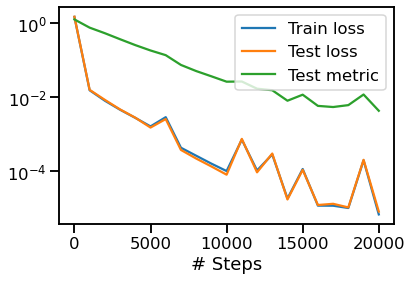

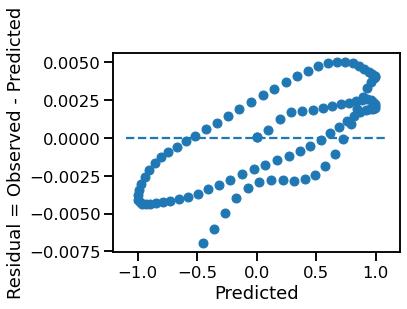

In [ ]:
import deepxde as dde
import numpy as np
from deepxde.backend import tf



def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.sin, boundary, component=0)
ic2 = dde.IC(geom, np.cos, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

### Customizing Function

In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import numpy as np
import matplotlib.pyplot as plt

'''
clu = x * sigmoid(x) = (1/ (1 + exp(-x)))
'''


def caf(x):
    return x * (1.0/(1.0 + torch.exp(-x)))

<ipython-input-6-0dadf7916b2b>:1: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /tmp/pip-req-build-_4mbk50o/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(-10, 10).view((-1, 1))


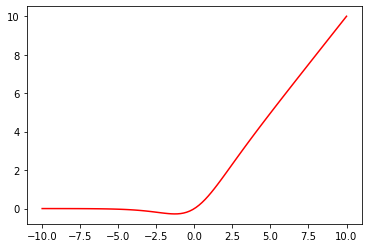

In [ ]:
x = torch.linspace(-10, 10).view((-1, 1))
y = caf(x)
plt.plot(x, y, "-r")

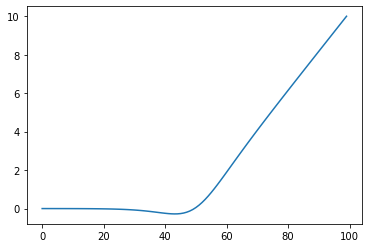

In [ ]:
class CAF(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return caf(x)

custom_af = CAF()

Net = torch.nn.Sequential(
     CAF()
     )

y = Net(x)

plt.plot(y.detach().numpy())

In [ ]:
from torchsummary import summary


class CAF(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.Tensor([0.1]), requires_grad=True)
        self.N = 10.0

    def forward(self, x):
        return  self.a * caf(x)

custom_af = CAF()

Net = torch.nn.Sequential()
Net.add_module("Linear-1", torch.nn.Linear(1, 100))
Net.add_module("Customized AF",  CAF())
Net.add_module("Linear-2",   torch.nn.Linear(100, 1))



y = Net(x)

for parameter in Net.named_parameters():
    print(parameter)

plt.plot(y.detach().numpy())

('Linear-1.weight', Parameter containing:
tensor([[ 0.9132],
        [ 0.9395],
        [-0.4091],
        [ 0.1909],
        [ 0.9695],
        [ 0.7378],
        [ 0.5077],
        [ 0.9854],
        [ 0.9713],
        [ 0.2693],
        [ 0.7384],
        [ 0.1516],
        [ 0.0106],
        [ 0.6430],
        [-0.0820],
        [-0.7945],
        [-0.3422],
        [ 0.3764],
        [ 0.3546],
        [-0.6190],
        [ 0.5505],
        [ 0.3775],
        [ 0.5873],
        [-0.4548],
        [ 0.2216],
        [ 0.4516],
        [-0.2410],
        [ 0.8732],
        [ 0.4424],
        [ 0.9401],
        [-0.4402],
        [ 0.3134],
        [-0.2704],
        [-0.7939],
        [ 0.8844],
        [-0.0355],
        [-0.7825],
        [ 0.6994],
        [-0.2284],
        [ 0.7483],
        [-0.3458],
        [-0.2138],
        [-0.7022],
        [-0.7431],
        [ 0.8225],
        [-0.0262],
        [-0.0709],
        [ 0.7240],
        [ 0.1388],
        [ 0.0276],
        

In [ ]:
summary(Net, (100,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               CAF-1               [-1, 100, 1]               0


AttributeError: 'int' object has no attribute 'numpy'